# Powering Tetouan: Time Series Forecasting on Power Consumption in Quads, Smir and Boussafou zones.

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import xgboost as xgb

In [525]:
df = pd.read_csv('sample_data.csv')

In [526]:
df.head()

,Datetime,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2/12/2017 14:40,30000,10000,20000
1,11/22/2017 15:30,30000,10000,20000
2,10/15/2017 1:50,30000,10000,20000
3,9/11/2017 23:00,30000,10000,20000
4,12/26/2017 1:20,30000,10000,20000


In [527]:
train = pd.read_csv('train_data.csv')

In [528]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,5/5/2017 22:30,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,5/5/2017 21:30,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,4/11/2017 16:40,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,9/30/2017 21:40,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,1/5/2017 10:40,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [529]:
from datetime import datetime

train['Datetime'] = train['Datetime'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))



In [530]:
train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [531]:
train.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
41927,2017-02-27 02:40:00,14.89,56.81,0.081,0.051,0.111,22600.67797,13542.85714,14408.68342
41928,2017-04-18 10:50:00,19.48,49.29,0.086,732.000,59.810,34770.80732,20492.87169,17815.27273
41929,2017-08-18 17:30:00,27.57,54.98,0.067,317.800,76.000,37615.80466,25519.32418,26892.03762
41930,2017-04-27 00:40:00,14.21,71.80,0.082,0.026,0.167,26722.92788,15085.53971,17396.36364
41931,2017-02-22 05:30:00,13.48,67.66,0.083,0.059,0.178,25425.76271,12729.48328,14130.81407


In [532]:
train = train.set_index('Datetime')


In [533]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


In [534]:
train = train.sort_index()

In [535]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048


In [536]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [537]:
train.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000
mean,18.794223,68.322970,1.958469,181.852878,75.093093,32320.339175,21026.447763,17818.976229
std,5.816396,15.550517,2.348605,263.567443,124.152443,7132.268087,5198.438443,6615.433440
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.380000,58.367500,0.078000,0.062000,0.122000,26275.404260,16964.133740,13104.578310
50%,18.770000,69.940000,0.086000,4.895500,4.318000,32234.913770,20802.910600,16409.233910
75%,22.860000,81.500000,4.915000,317.200000,101.300000,37274.569030,24683.207865,21580.023753
max,39.780000,94.800000,6.483000,1163.000000,933.000000,52204.395120,37408.860760,47598.326360


In [538]:
train.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:50:00', '2017-01-01 01:00:00',
               '2017-01-01 01:10:00', '2017-01-01 01:40:00',
               '2017-01-01 01:50:00', '2017-01-01 02:00:00',
               ...
               '2017-12-30 22:10:00', '2017-12-30 22:20:00',
               '2017-12-30 22:30:00', '2017-12-30 22:40:00',
               '2017-12-30 22:50:00', '2017-12-30 23:00:00',
               '2017-12-30 23:10:00', '2017-12-30 23:20:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='Datetime', length=41932, freq=None)

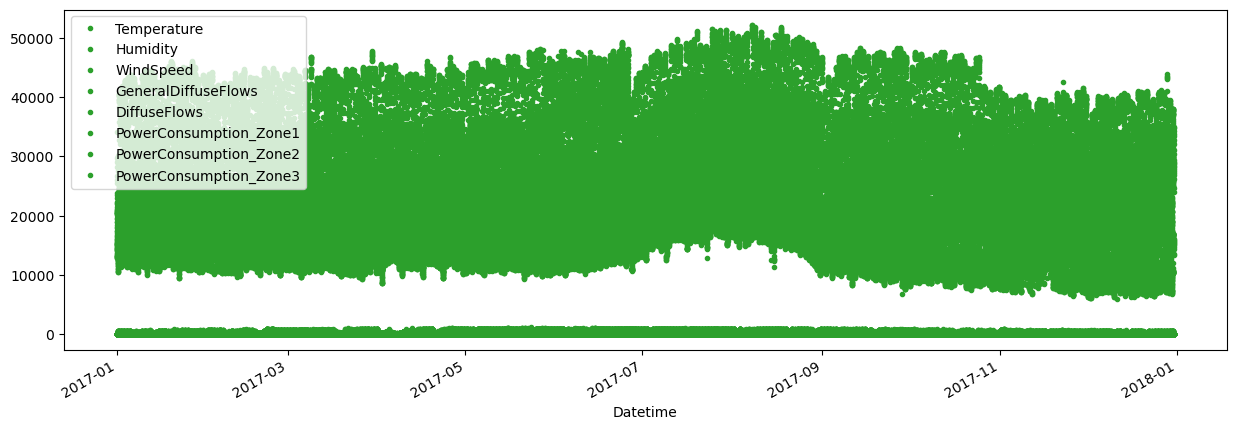

In [539]:
color_pal = sns.color_palette()
train.plot(style='.', figsize=(15, 5),
           color=color_pal[2],
           )
plt.show()

In [540]:
train.duplicated().sum()

0

In [541]:
train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [542]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

<AxesSubplot:xlabel='Datetime'>

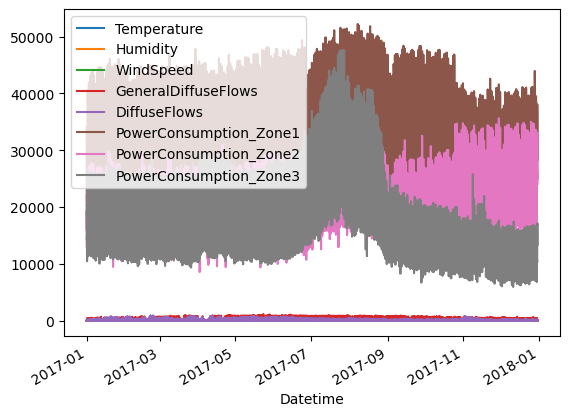

In [543]:
train.plot()

In [544]:
from statsmodels.tsa.stattools import adfuller

In [545]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [546]:
adf_test(train['PowerConsumption_Zone1'])

ADF Statistics: -31.241383612466837
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [547]:
adf_test(train['PowerConsumption_Zone2'])

ADF Statistics: -24.40380275781996
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [548]:
adf_test(train['PowerConsumption_Zone3'])

ADF Statistics: -14.225768828229596
p- value: 1.6283818887320797e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Datetime'>

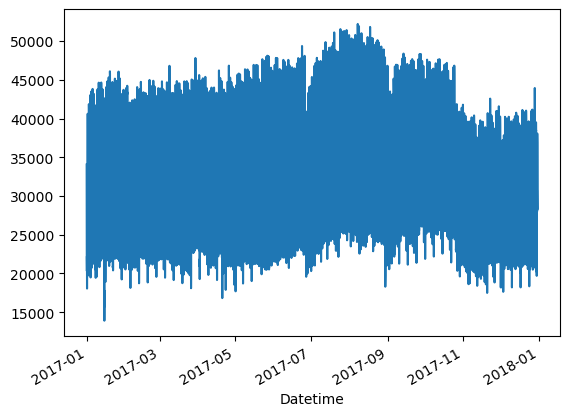

In [549]:
train['PowerConsumption_Zone1'].plot()

<AxesSubplot:xlabel='Datetime'>

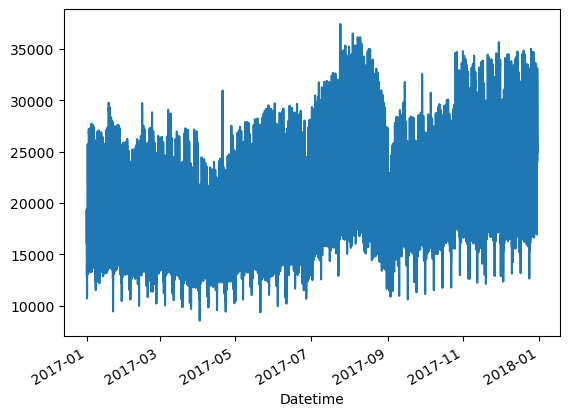

In [550]:
train['PowerConsumption_Zone2'].plot()

<AxesSubplot:xlabel='Datetime'>

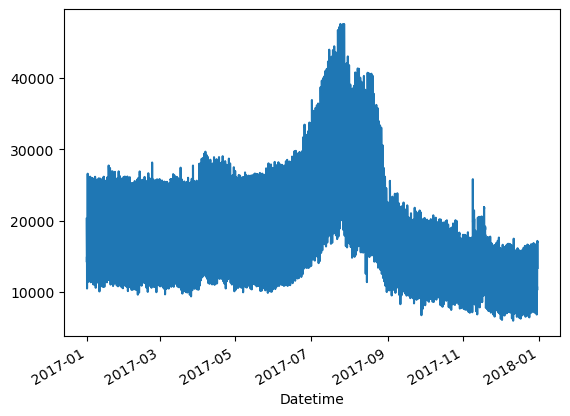

In [551]:
train['PowerConsumption_Zone3'].plot()

## Outliers Analysis and removal


<AxesSubplot:ylabel='Frequency'>

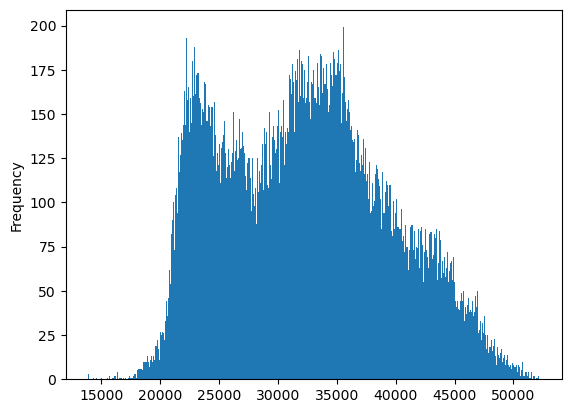

In [552]:
train['PowerConsumption_Zone1'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

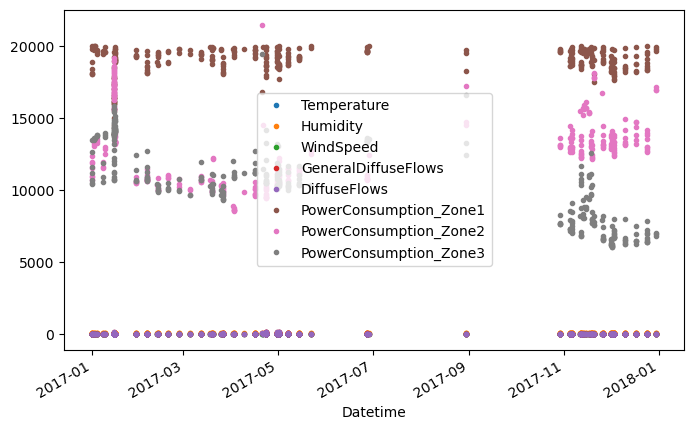

In [553]:
train.query('PowerConsumption_Zone1 < 20_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

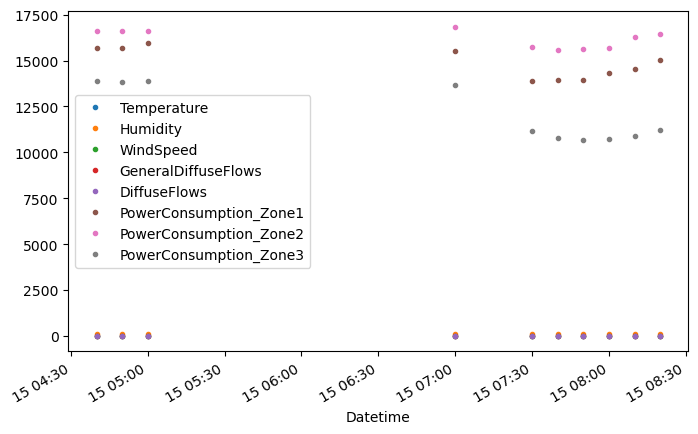

In [554]:
train.query('PowerConsumption_Zone1 < 16_000').plot(figsize=(8, 5), style = '.')



In [555]:
train = train.query('PowerConsumption_Zone1 > 19_000').copy()

<AxesSubplot:ylabel='Frequency'>

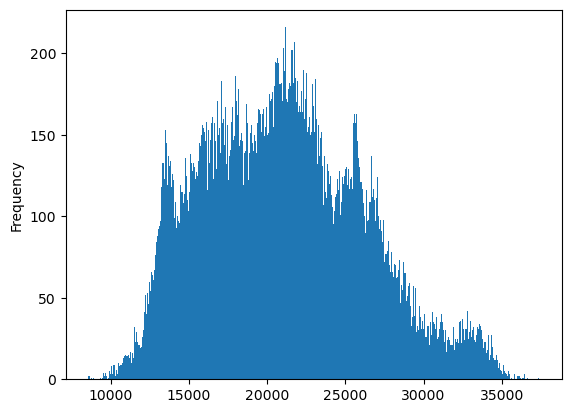

In [556]:
train['PowerConsumption_Zone2'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

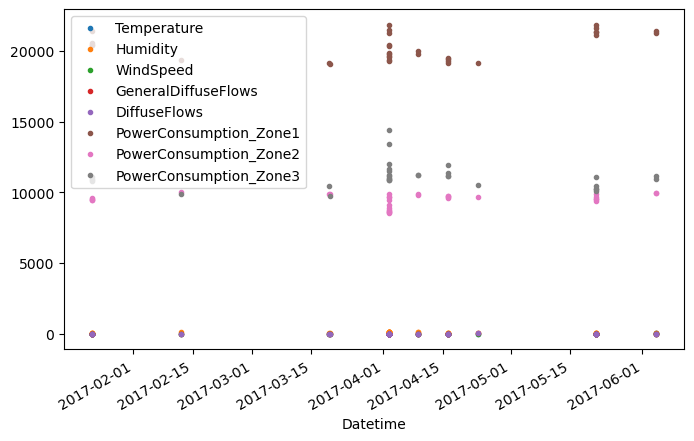

In [557]:
train.query('PowerConsumption_Zone2 < 10_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

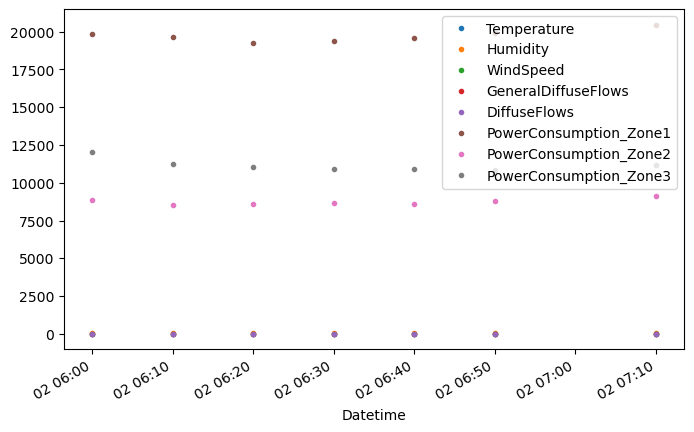

In [558]:
train.query('PowerConsumption_Zone2 < 9_300').plot(figsize=(8, 5), style = '.')

In [559]:
train = train.query('PowerConsumption_Zone2 > 9_300').copy()

<AxesSubplot:ylabel='Frequency'>

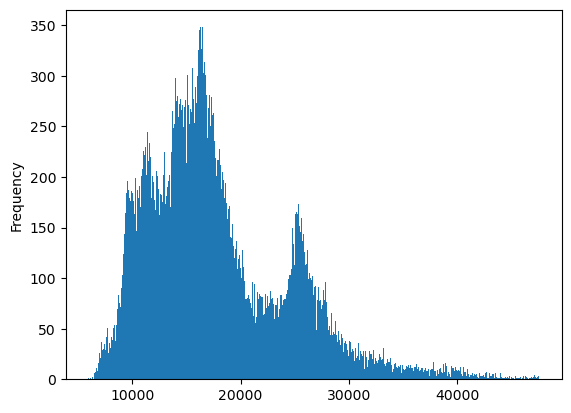

In [560]:
train['PowerConsumption_Zone3'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

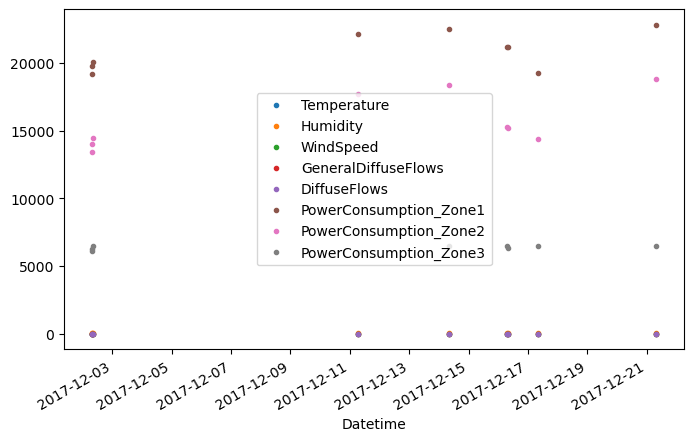

In [561]:
train.query('PowerConsumption_Zone3 < 6_500').plot(figsize=(8, 5), style = '.')


In [562]:
train = train.query('PowerConsumption_Zone3 > 6_500').copy()

In [563]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

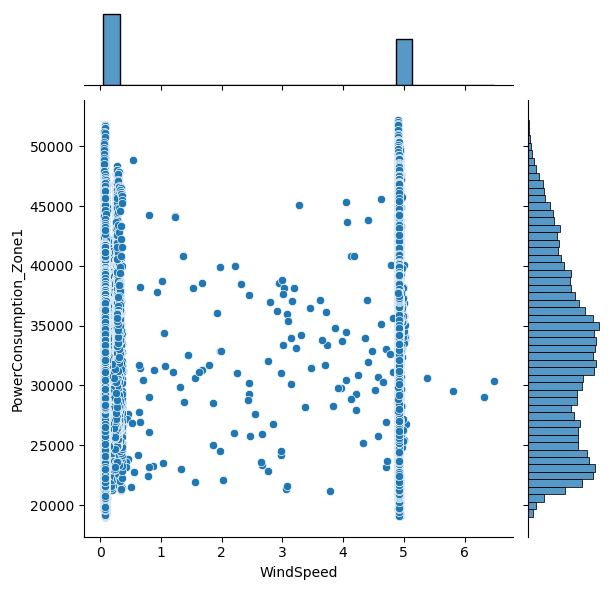

In [564]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone1', data=train)

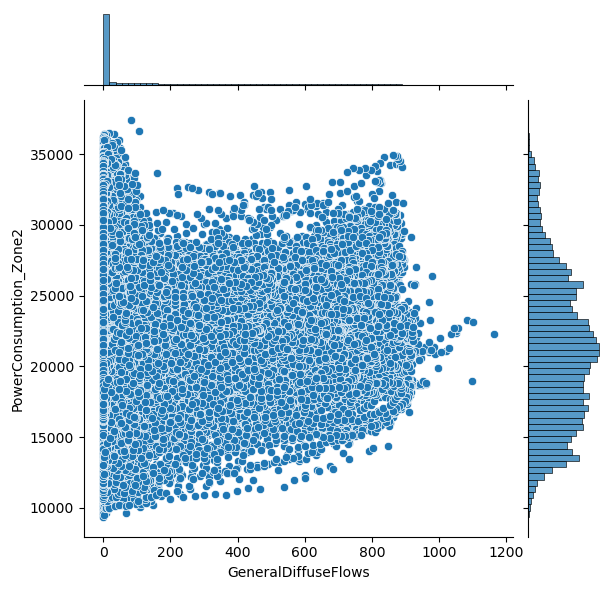

In [565]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone2', data=train)

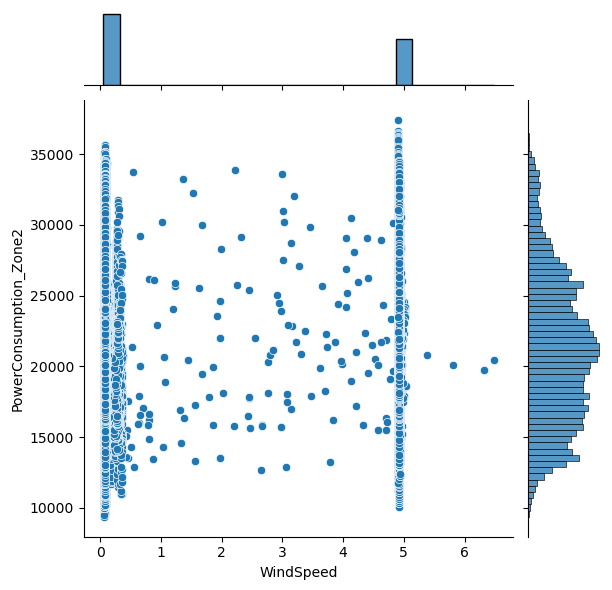

In [566]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone2', data=train)

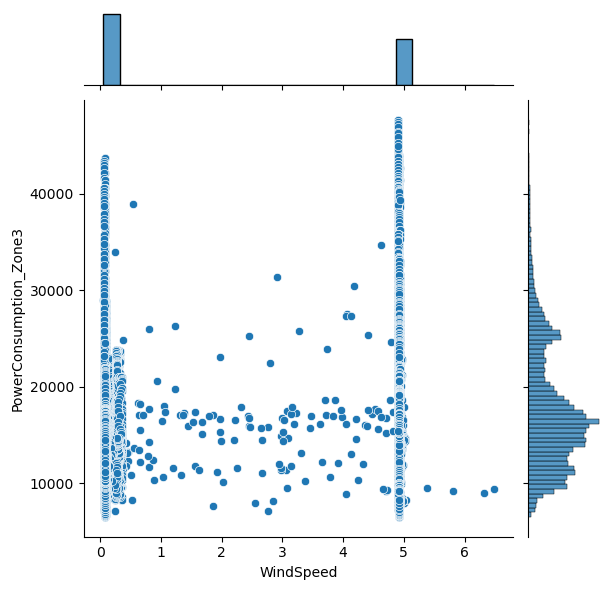

In [567]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone3', data=train)

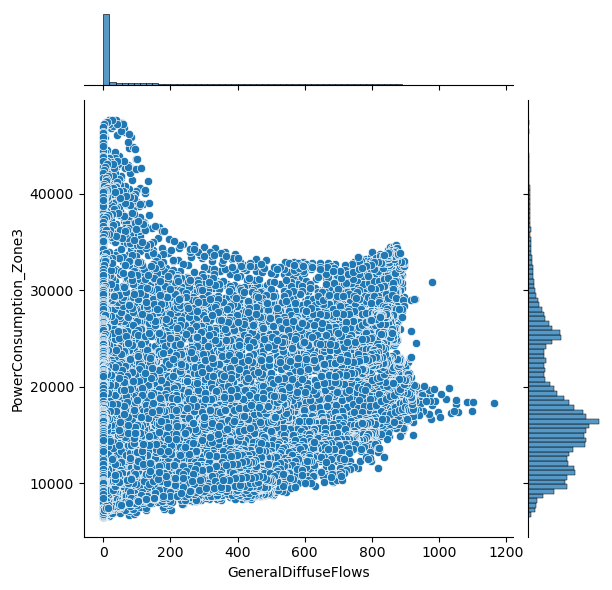

In [568]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone3', data=train)

In [569]:
uv = np.percentile(train.WindSpeed,[99])[0]

In [570]:
train[(train.WindSpeed>uv)]

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 10:20:00,5.996,69.85,4.930,282.70,31.960,26393.92405,16059.57447,14671.807230
2017-05-09 14:10:00,21.420,71.00,4.931,827.00,132.600,35705.70492,23342.41486,15997.408910
2017-05-09 14:20:00,21.510,70.40,4.930,808.00,122.100,35819.01639,23297.83282,16417.165990
2017-05-11 13:40:00,21.850,69.90,4.930,867.00,218.500,36423.34426,23030.34056,17845.506070
2017-05-15 15:10:00,21.140,67.60,4.931,795.00,435.900,34119.34426,23134.36533,17507.368420
...,...,...,...,...,...,...,...,...
2017-11-19 08:30:00,9.770,85.70,4.934,62.93,33.360,20972.30769,14016.94215,8454.939759
2017-11-19 08:40:00,9.940,85.40,4.933,94.40,39.400,21323.07692,14485.53719,8611.084337
2017-11-19 09:00:00,9.930,84.40,4.932,107.30,33.820,22633.84615,15162.39669,9039.036145


In [571]:
train.WindSpeed[(train.WindSpeed> 3*uv)] = 3*uv

## Feature Creation

In [572]:
def create_features(df):
    """
    Create time series features based on time series index.
    """

    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['minute'] = df.index.minute
    return df

train = create_features(train)

In [573]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute
Datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,1,1,0
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,1,1,10
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,1,1,20
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,1,1,30
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,1,1,50


In [574]:
def add_lags(df):
    target_map = df['PowerConsumption_Zone1'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [575]:
train = add_lags(train)


In [576]:
def add_lags1(df):
    target_map = df['PowerConsumption_Zone2'].to_dict()
    df['lag2'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [577]:
train = add_lags1(train)


In [578]:
def add_lags2(df):
    target_map = df['PowerConsumption_Zone3'].to_dict()
    df['lag3'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [579]:
train = add_lags2(train)


In [580]:
train

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,1,1,0,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,1,1,10,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,1,1,20,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,1,1,30,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,1,1,50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,23,5,4,12,364,30,0,32067.69231,26427.27273,13607.71084
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,10,31347.69231,25705.78512,13301.20482
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,20,30603.07692,25088.42975,13081.44578


## Removing Seasonnality

<AxesSubplot:xlabel='month'>

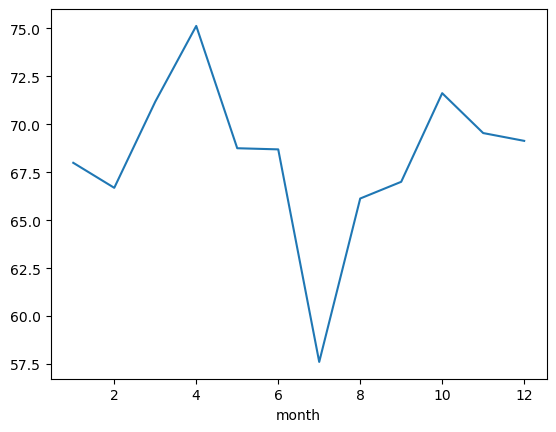

In [581]:
train.groupby('month')['Humidity'].mean().plot()

<AxesSubplot:xlabel='month'>

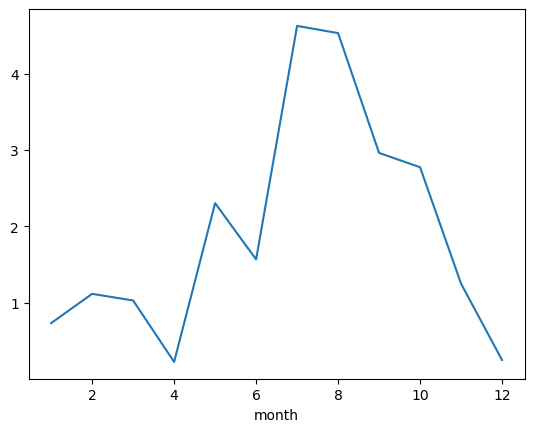

In [582]:
train.groupby('month')['WindSpeed'].mean().plot()


<AxesSubplot:xlabel='month'>

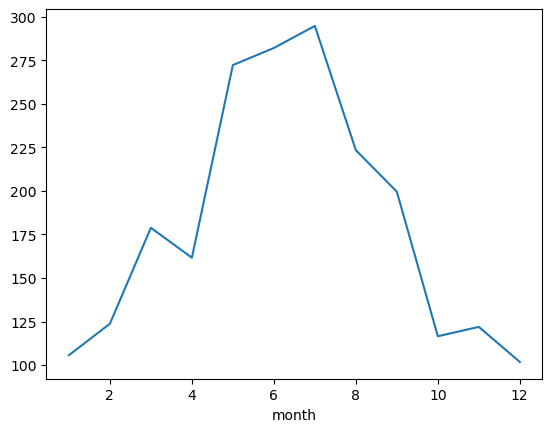

In [583]:
train.groupby('month')['GeneralDiffuseFlows'].mean().plot()


<AxesSubplot:xlabel='month'>

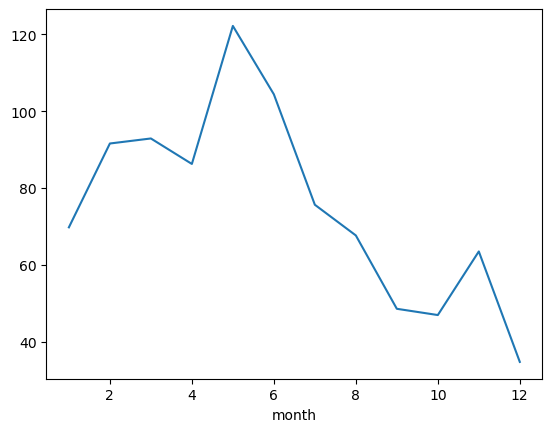

In [584]:
train.groupby('month')['DiffuseFlows'].mean().plot()

In [585]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,1,1,0,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,1,1,10,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,1,1,20,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,1,1,30,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,1,1,50,NaN,NaN,NaN


## Visualize our feature/target relationship

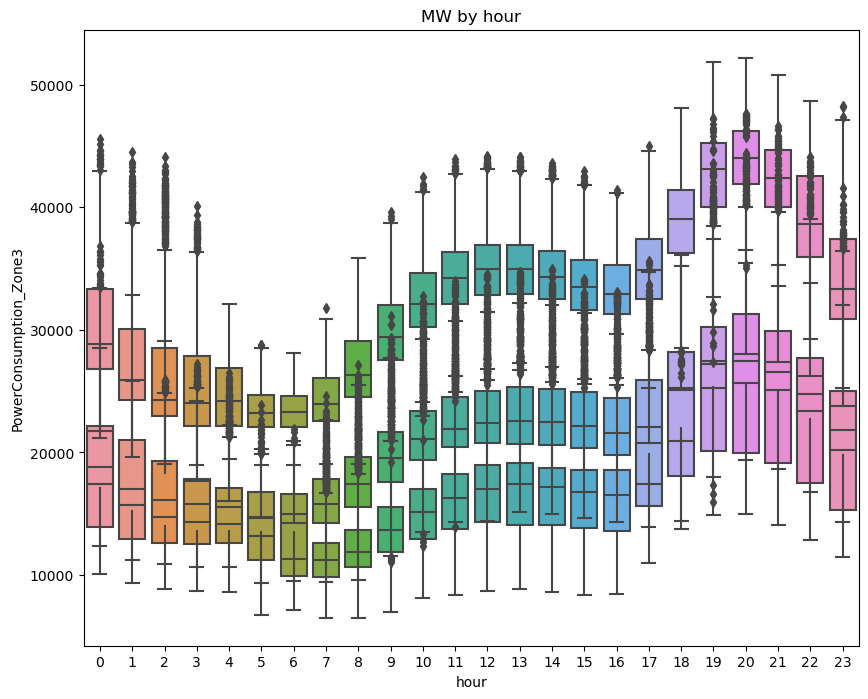

In [586]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone2')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone3')


ax.set_title('MW by hour')
plt.show()

<AxesSubplot:xlabel='PowerConsumption_Zone1', ylabel='count'>

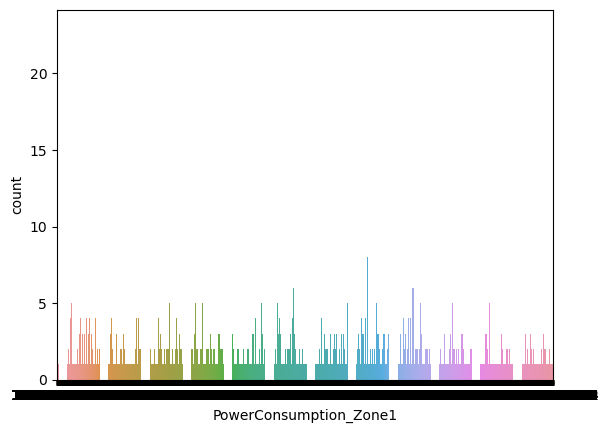

In [587]:
sns.countplot(x="PowerConsumption_Zone1", data= train)

<AxesSubplot:xlabel='PowerConsumption_Zone2', ylabel='count'>

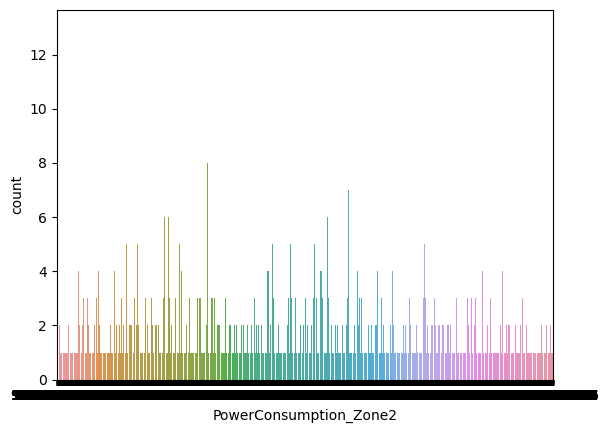

In [588]:
sns.countplot(x="PowerConsumption_Zone2", data= train)

<AxesSubplot:xlabel='PowerConsumption_Zone3', ylabel='count'>

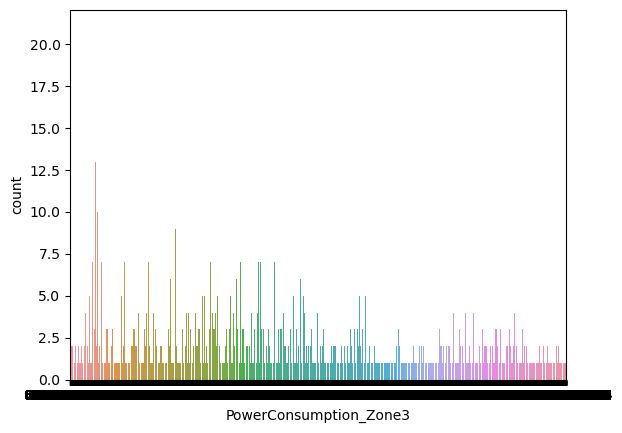

In [589]:
sns.countplot(x="PowerConsumption_Zone3", data= train)

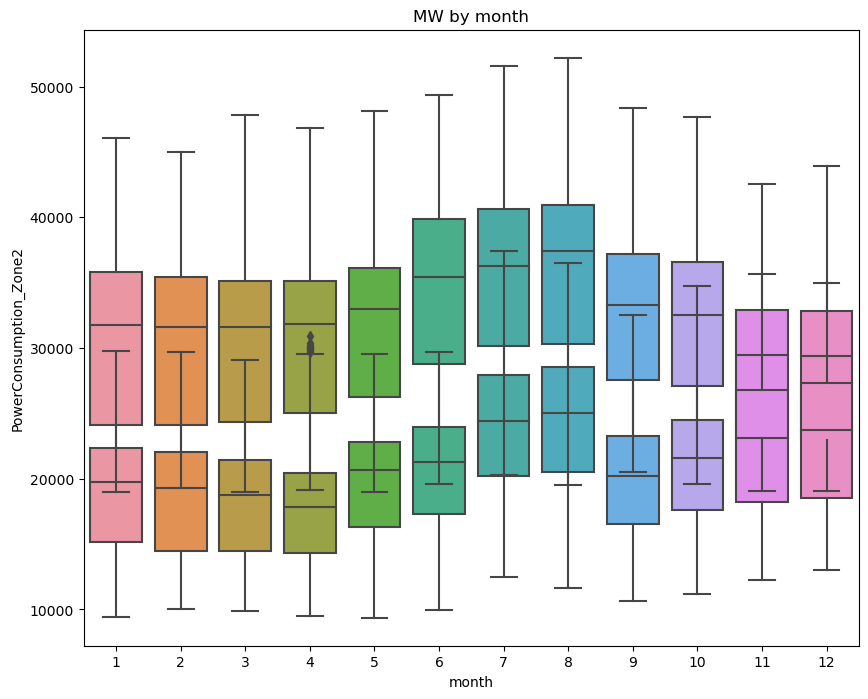

In [590]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone2')



ax.set_title('MW by month')
plt.show()

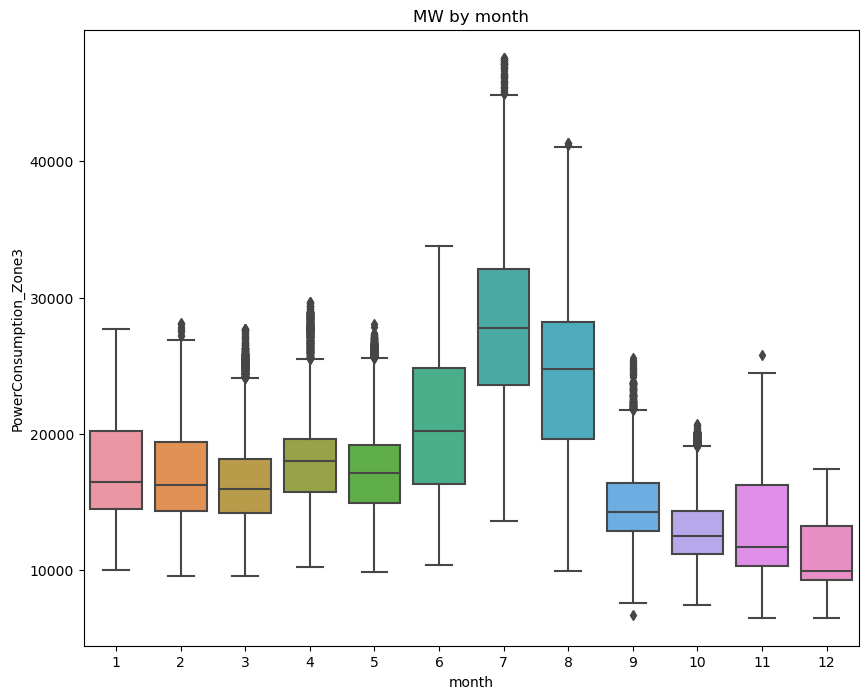

In [591]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone3')



ax.set_title('MW by month')
plt.show()

In [592]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
hour                        int64
dayofweek                   int64
quarter                     int64
month                       int64
dayofyear                   int64
dayofmonth                  int64
minute                      int64
lag1                      float64
lag2                      float64
lag3                      float64
dtype: object

In [593]:
train.isnull().sum()

Temperature                   0
Humidity                      0
WindSpeed                     0
GeneralDiffuseFlows           0
DiffuseFlows                  0
PowerConsumption_Zone1        0
PowerConsumption_Zone2        0
PowerConsumption_Zone3        0
hour                          0
dayofweek                     0
quarter                       0
month                         0
dayofyear                     0
dayofmonth                    0
minute                        0
lag1                      11167
lag2                      11167
lag3                      11167
dtype: int64

In [594]:
train.shape

(41773, 18)

In [595]:
#train = train.dropna()

In [596]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_ ,
            columns =['importance'])

In [597]:
fi.sort_values('importance')

,importance
lag2,0.000741
dayofmonth,0.001870
WindSpeed,0.003851
Humidity,0.007131
DiffuseFlows,0.007720
GeneralDiffuseFlows,0.014248
lag1,0.029080
month,0.042804
hour,0.134695
dayofyear,0.138846


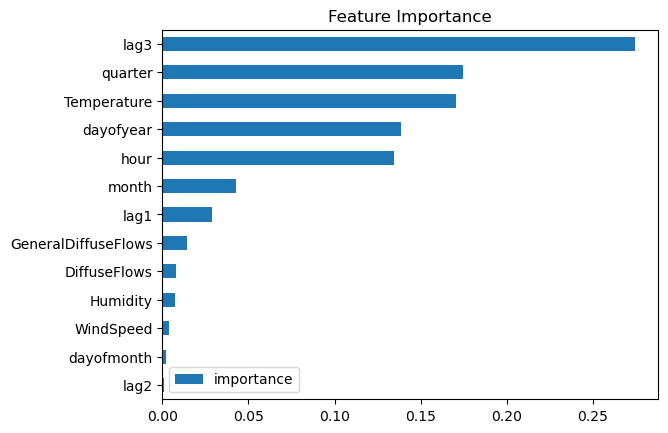

In [598]:
fi.sort_values('importance').plot(kind='barh', title ='Feature Importance')
plt.show()

In [599]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'dayofyear', 'dayofmonth', 'minute', 'lag1', 'lag2', 'lag3'],
      dtype='object')

In [600]:
train.drop('dayofweek', axis=1)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,quarter,month,dayofyear,dayofmonth,minute,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,1,1,0,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,1,1,10,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,1,1,20,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,1,1,30,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,1,1,1,1,50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,23,4,12,364,30,0,32067.69231,26427.27273,13607.71084
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,4,12,364,30,10,31347.69231,25705.78512,13301.20482
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,4,12,364,30,20,30603.07692,25088.42975,13081.44578


In [601]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

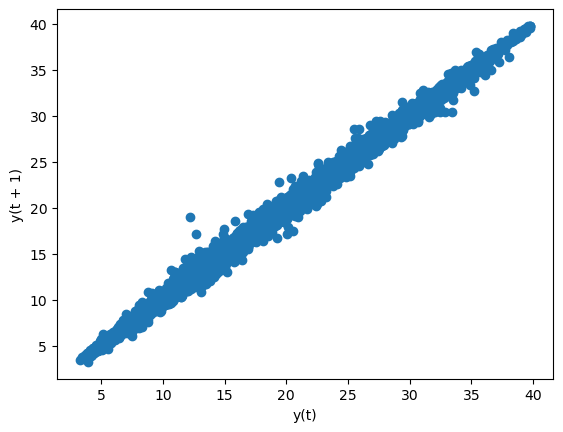

In [602]:
lag_plot(train['Temperature'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

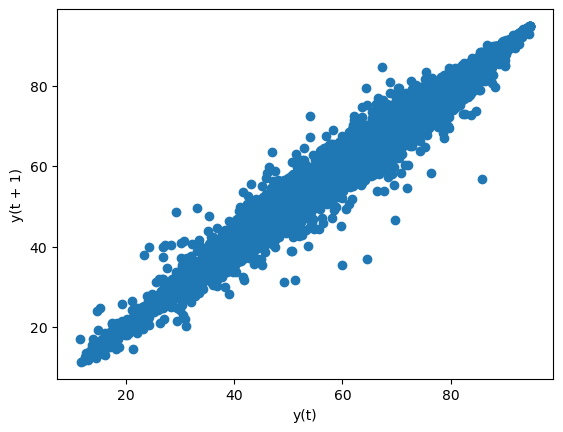

In [603]:
lag_plot(train['Humidity'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

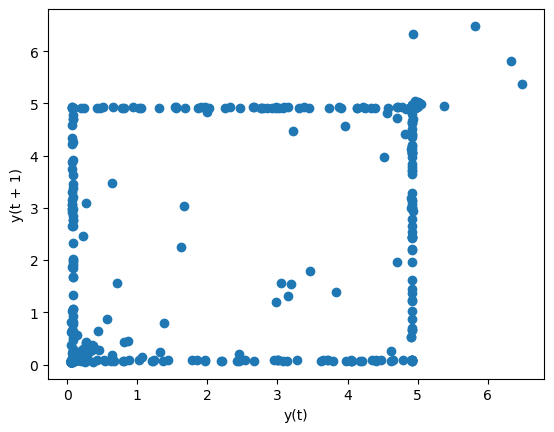

In [604]:
lag_plot(train['WindSpeed'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

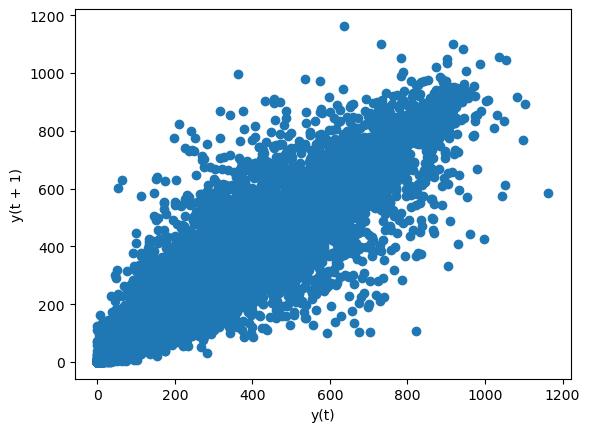

In [605]:
lag_plot(train['GeneralDiffuseFlows'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

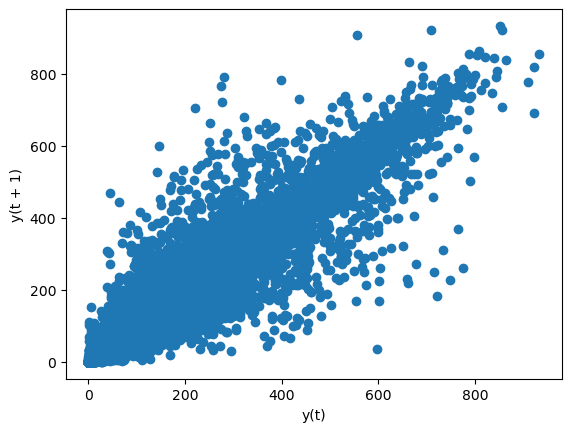

In [606]:
lag_plot(train['DiffuseFlows'])

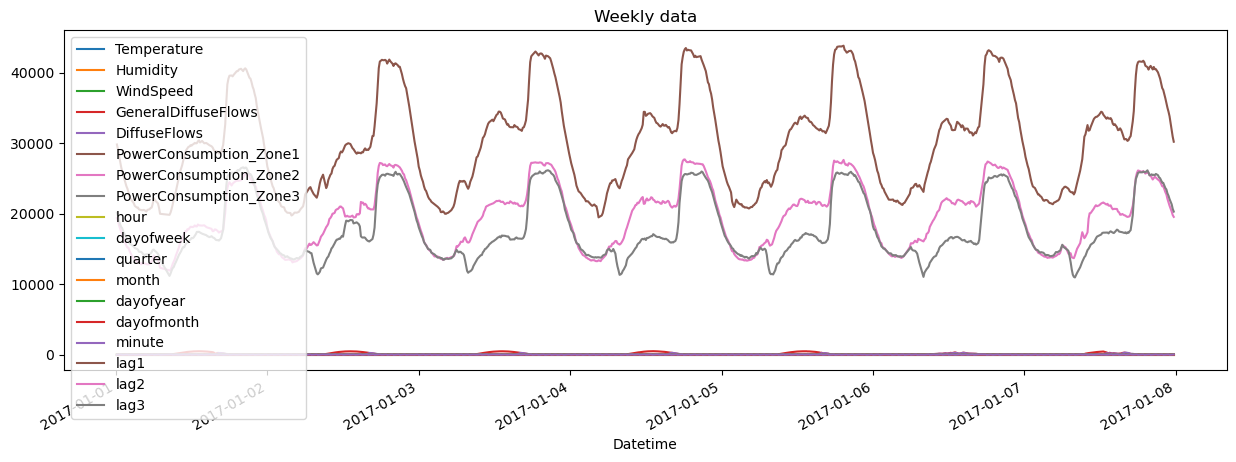

In [607]:
train.loc[(train.index > '01-01-2017') & (train.index < '01-08-2017')].plot(figsize=(15,5), title='Weekly data')
plt.show()

In [609]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'dayofyear', 'dayofmonth', 'minute', 'lag1', 'lag2', 'lag3'],
      dtype='object')

In [612]:
train

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,1,1,0,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,1,1,10,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,1,1,20,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,1,1,30,NaN,NaN,NaN
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,6,1,1,1,1,50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,23,5,4,12,364,30,0,32067.69231,26427.27273,13607.71084
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,10,31347.69231,25705.78512,13301.20482
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,20,30603.07692,25088.42975,13081.44578


In [608]:
test_data = pd.read_csv('test_data.csv')

In [626]:
test_data.sort_index()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute
Datetime,,,,,,,,,,,,
2017-01-01 00:40:00,5.921,75.70,0.081,0.048,0.085,0,6,1,1,1,1,40
2017-01-01 01:20:00,5.678,78.10,0.081,0.066,0.141,1,6,1,1,1,1,20
2017-01-01 01:30:00,5.491,77.30,0.082,0.062,0.111,1,6,1,1,1,1,30
2017-01-01 02:40:00,5.020,79.70,0.081,0.051,0.134,2,6,1,1,1,1,40
2017-01-01 03:50:00,4.805,76.20,0.081,0.059,0.134,3,6,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 20:20:00,8.900,63.62,0.076,0.048,0.085,20,5,4,12,364,30,20
2017-12-30 20:50:00,9.290,64.25,0.085,0.070,0.085,20,5,4,12,364,30,50
2017-12-30 21:10:00,7.890,69.83,0.080,0.062,0.134,21,5,4,12,364,30,10


In [621]:
test_data = test_data.set_index('Datetime')

In [623]:
test_data.index = pd.to_datetime(test_data.index)

In [624]:
test_data = create_features(test_data)

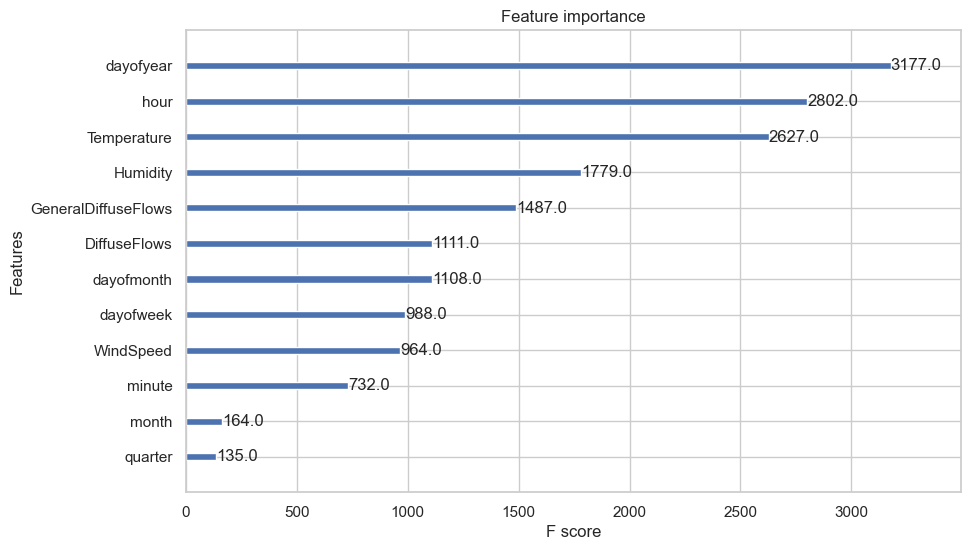

In [748]:


# Split data into features and target variables
X_train = train.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3','lag1', 'lag2', 'lag3'], axis=1)
y_train = train[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]
X_test = test_data

# Set up XGBoost model
xgb_model = xgb.XGBRegressor()

# Fit model on training set
xgb_model.fit(X_train, y_train)

# Make predictions on test set
predictions = xgb_model.predict(X_test)

# Create a new DataFrame for the predictions
output_df = test_data.copy()
output_df['predicted_Zone1'] = predictions[:,0]
output_df['predicted_Zone2'] = predictions[:,1]
output_df['predicted_Zone3'] = predictions[:,2]


# Plot feature importance
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
xgb.plot_importance(xgb_model, ax=ax)
plt.title('Feature importance')
plt.show()


In [749]:
output_df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,hour,dayofweek,quarter,month,dayofyear,dayofmonth,minute,predicted_Zone1,predicted_Zone2,predicted_Zone3
Datetime,,,,,,,,,,,,,,,
2017-02-12 14:40:00,13.28,82.80,0.074,127.000,128.400,14,6,1,2,43,12,40,32826.761719,18606.365234,18135.251953
2017-11-22 15:30:00,15.72,48.38,4.923,126.200,119.900,15,2,4,11,326,22,30,31140.587891,24981.931641,10756.497070
2017-10-15 01:50:00,17.25,85.80,0.079,0.055,0.130,1,6,4,10,288,15,50,27159.482422,15826.247070,12100.685547
2017-09-11 23:00:00,21.66,60.52,0.270,0.102,0.104,23,0,3,9,254,11,0,37210.238281,21774.451172,17854.986328
2017-12-26 01:20:00,8.75,79.90,0.079,0.066,0.126,1,1,4,12,360,26,20,23315.828125,19194.353516,10497.629883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01 13:00:00,12.39,47.18,4.920,581.400,623.500,13,2,1,2,32,1,0,35316.414062,20856.980469,17321.421875
2017-05-17 14:40:00,21.70,65.90,4.919,780.000,313.900,14,2,2,5,137,17,40,35539.972656,22702.640625,17825.201172
2017-09-03 07:00:00,20.34,54.32,4.924,9.500,6.165,7,6,3,9,246,3,0,22896.740234,10765.179688,11634.400391


In [750]:
output_df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'hour', 'dayofweek', 'quarter', 'month', 'dayofyear',
       'dayofmonth', 'minute', 'predicted_Zone1', 'predicted_Zone2',
       'predicted_Zone3'],
      dtype='object')

In [751]:
output_df = output_df.drop(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'hour', 'dayofweek', 'quarter', 'month', 'dayofyear',
       'dayofmonth', 'minute'], axis=1)

In [752]:
output_df

,predicted_Zone1,predicted_Zone2,predicted_Zone3
Datetime,,,
2017-02-12 14:40:00,32826.761719,18606.365234,18135.251953
2017-11-22 15:30:00,31140.587891,24981.931641,10756.497070
2017-10-15 01:50:00,27159.482422,15826.247070,12100.685547
2017-09-11 23:00:00,37210.238281,21774.451172,17854.986328
2017-12-26 01:20:00,23315.828125,19194.353516,10497.629883
...,...,...,...
2017-02-01 13:00:00,35316.414062,20856.980469,17321.421875
2017-05-17 14:40:00,35539.972656,22702.640625,17825.201172
2017-09-03 07:00:00,22896.740234,10765.179688,11634.400391


In [753]:
output_df['11/22/2017 ']

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_30737/2795299221.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  output_df['11/22/2017 ']


,predicted_Zone1,predicted_Zone2,predicted_Zone3
Datetime,,,
2017-11-22 15:30:00,31140.587891,24981.931641,10756.497070
2017-11-22 05:20:00,22790.636719,17993.648438,10343.682617
2017-11-22 02:40:00,21828.789062,17090.658203,10140.194336
2017-11-22 23:50:00,27464.525391,22954.101562,12018.909180
2017-11-22 12:20:00,31789.792969,24952.650391,10639.594727
2017-11-22 15:10:00,31148.185547,25167.220703,10637.444336
2017-11-22 06:50:00,21629.517578,17875.439453,8722.260742
2017-11-22 19:00:00,39247.253906,32841.363281,16780.398438
2017-11-22 11:30:00,31497.023438,23888.033203,10421.392578


In [754]:
output_df['Datetime'] = output_df.index 
output_df.reset_index(drop=True, inplace=True)

In [755]:
output_df.dtypes

predicted_Zone1           float32
predicted_Zone2           float32
predicted_Zone3           float32
Datetime           datetime64[ns]
dtype: object

In [756]:
output_df

,predicted_Zone1,predicted_Zone2,predicted_Zone3,Datetime
0,32826.761719,18606.365234,18135.251953,2017-02-12 14:40:00
1,31140.587891,24981.931641,10756.497070,2017-11-22 15:30:00
2,27159.482422,15826.247070,12100.685547,2017-10-15 01:50:00
3,37210.238281,21774.451172,17854.986328,2017-09-11 23:00:00
4,23315.828125,19194.353516,10497.629883,2017-12-26 01:20:00
...,...,...,...,...
10478,35316.414062,20856.980469,17321.421875,2017-02-01 13:00:00
10479,35539.972656,22702.640625,17825.201172,2017-05-17 14:40:00
10480,22896.740234,10765.179688,11634.400391,2017-09-03 07:00:00
10481,31807.718750,23922.048828,10232.193359,2017-11-23 11:40:00


output_df['Datetime'] = pd.to_datetime(output_df['Datetime'], format="%d/%m/%Y %H:%M")


In [757]:
output_df['Datetime'] = pd.to_datetime(output_df['Datetime'], format='%m/%d/%Y %H:%M')
output_df['Datetime'] = output_df['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [764]:
for i in range(len(output_df)):
    datetime_str = output_df.loc[i, 'Datetime']
    datetime_obj = datetime.strptime(datetime_str, '%m/%d/%Y %H:%M')
    datetime_formatted = datetime_obj.strftime('%-m/%-d/%Y %-H:%M')
    output_df.loc[i, 'Datetime'] = datetime_formatted

print(output_df)

       predicted_Zone1  predicted_Zone2  predicted_Zone3          Datetime
0         32826.761719     18606.365234     18135.251953   2/12/2017 14:40
1         31140.587891     24981.931641     10756.497070  11/22/2017 15:30
2         27159.482422     15826.247070     12100.685547   10/15/2017 1:50
3         37210.238281     21774.451172     17854.986328   9/11/2017 23:00
4         23315.828125     19194.353516     10497.629883   12/26/2017 1:20
...                ...              ...              ...               ...
10478     35316.414062     20856.980469     17321.421875    2/1/2017 13:00
10479     35539.972656     22702.640625     17825.201172   5/17/2017 14:40
10480     22896.740234     10765.179688     11634.400391     9/3/2017 7:00
10481     31807.718750     23922.048828     10232.193359  11/23/2017 11:40
10482     41689.589844     25463.625000     25484.050781   6/14/2017 23:40

[10483 rows x 4 columns]


In [765]:
output_df

,predicted_Zone1,predicted_Zone2,predicted_Zone3,Datetime
0,32826.761719,18606.365234,18135.251953,2/12/2017 14:40
1,31140.587891,24981.931641,10756.497070,11/22/2017 15:30
2,27159.482422,15826.247070,12100.685547,10/15/2017 1:50
3,37210.238281,21774.451172,17854.986328,9/11/2017 23:00
4,23315.828125,19194.353516,10497.629883,12/26/2017 1:20
...,...,...,...,...
10478,35316.414062,20856.980469,17321.421875,2/1/2017 13:00
10479,35539.972656,22702.640625,17825.201172,5/17/2017 14:40
10480,22896.740234,10765.179688,11634.400391,9/3/2017 7:00
10481,31807.718750,23922.048828,10232.193359,11/23/2017 11:40


In [766]:
import pandas as pd


file_path = '/Users/SalmaDkier/Desktop/fdata.csv'

# save the DataFrame to a CSV file at the specified location
output_df.to_csv(file_path, index=False)

## Train / Test Split

In [389]:
train_ = train.loc[train.index < '09-01-2017']
test_ = train.loc[train.index >= '09-01-2017']

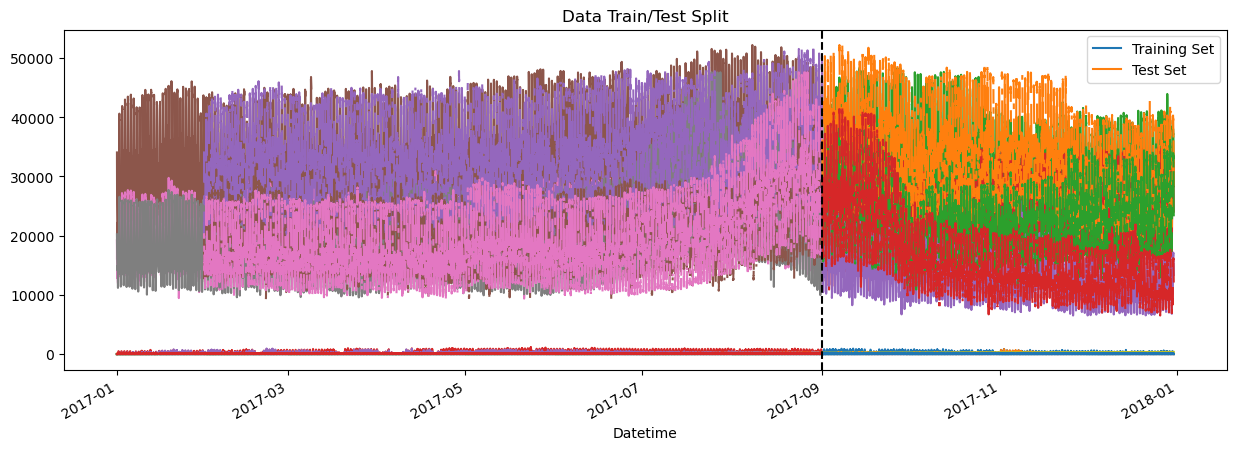

In [390]:
fig, ax = plt.subplots(figsize=(15, 5))
train_.plot(ax=ax, label='Training set',title='Data Train/Test Split')
test_.plot(ax=ax, label='Test Set')
ax.axvline('09-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Time Series Cross Validation

In [400]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=10*364*1, gap=10)
train = train.sort_index()

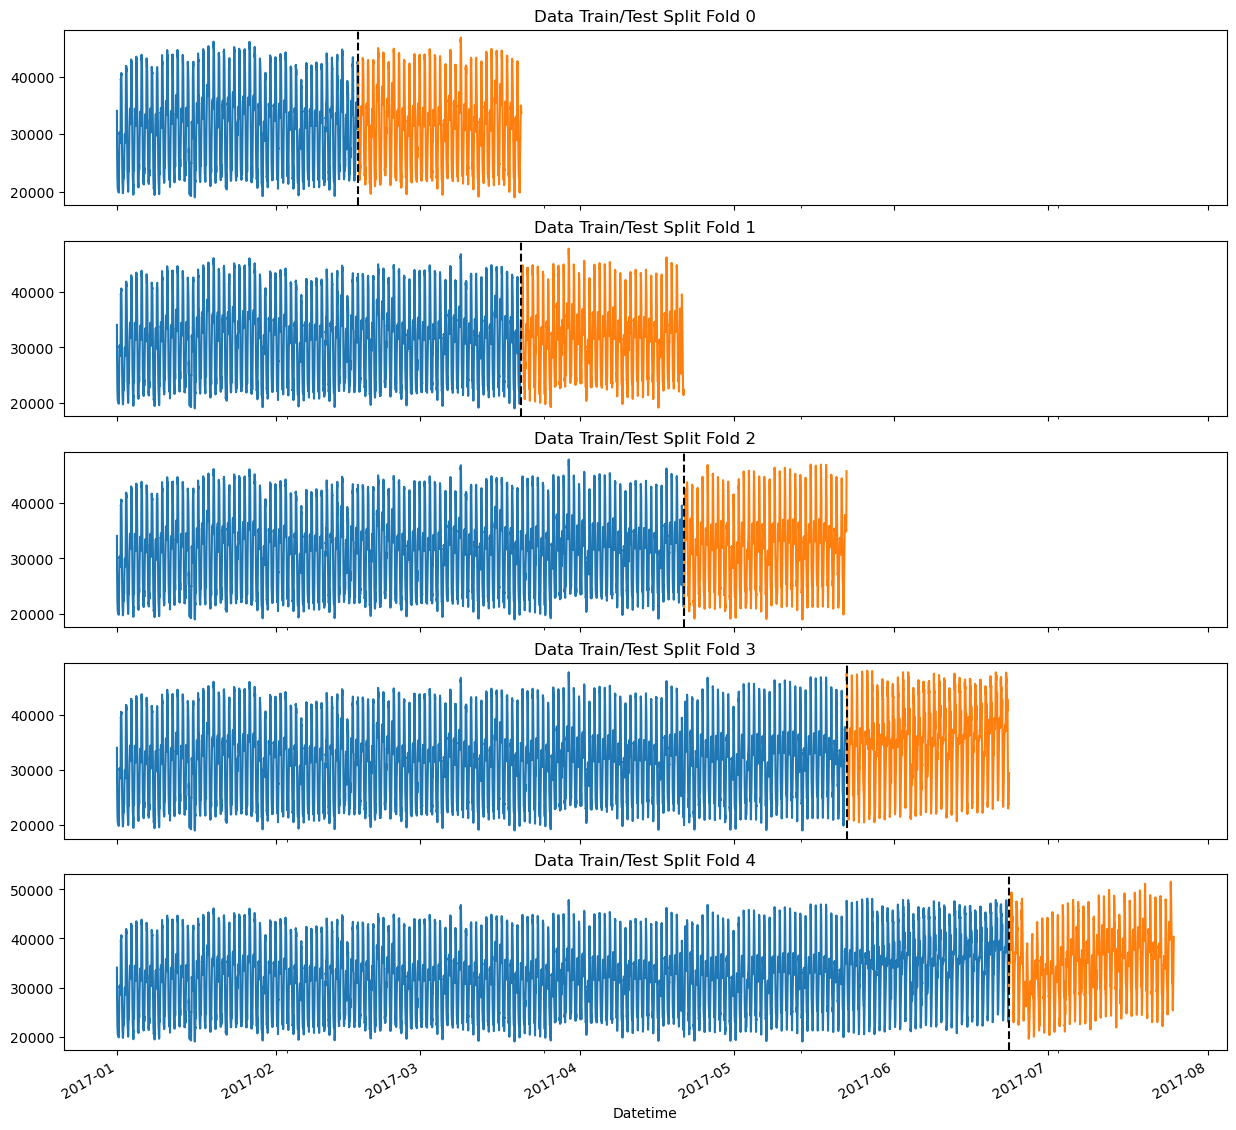

In [522]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train):
    train_ = train.iloc[train_idx]
    test_ = train.iloc[val_idx]
    train_['PowerConsumption_Zone1'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test_['PowerConsumption_Zone1'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test_.index.min(), color='black', ls='--')
    fold += 1
plt.show()

## Train using cross validation

In [627]:
tss = TimeSeriesSplit(n_splits=5, test_size=10*364*1, gap=10)



fold = 0
preds = []
scores = []

  
FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour',  'quarter', 'month',
        'dayofyear', 'dayofmonth']
TARGET = ['PowerConsumption_Zone1']

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

y_pred = reg.predict(X_test)
preds.append(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
scores.append(score)

KeyError: "None of [Index(['PowerConsumption_Zone1'], dtype='object')] are in the [columns]"

In [409]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 2287.7928
Fold scores:[2290.41502558672, 2816.9308036335483, 2700.768645247284, 1932.8090557141113, 1698.0402895789005]


## Predicting the future

In [410]:

FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour', 'quarter', 'month',
        'dayofyear', 'dayofmonth',  'lag1', 'lag2',
       'lag3']
TARGET = ['PowerConsumption_Zone1']

X_all = train[FEATURES]
y_all = train[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[23:37:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32813.54009
[100]	validation_0-rmse:12384.66046
[200]	validation_0-rmse:5249.34211
[300]	validation_0-rmse:3073.52894
[400]	validation_0-rmse:2532.40881
[499]	validation_0-rmse:2362.65996


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [411]:
y_all.sort_index()

,PowerConsumption_Zone1
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:50:00,26624.81013
...,...
2017-12-30 23:00:00,32158.17490
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825


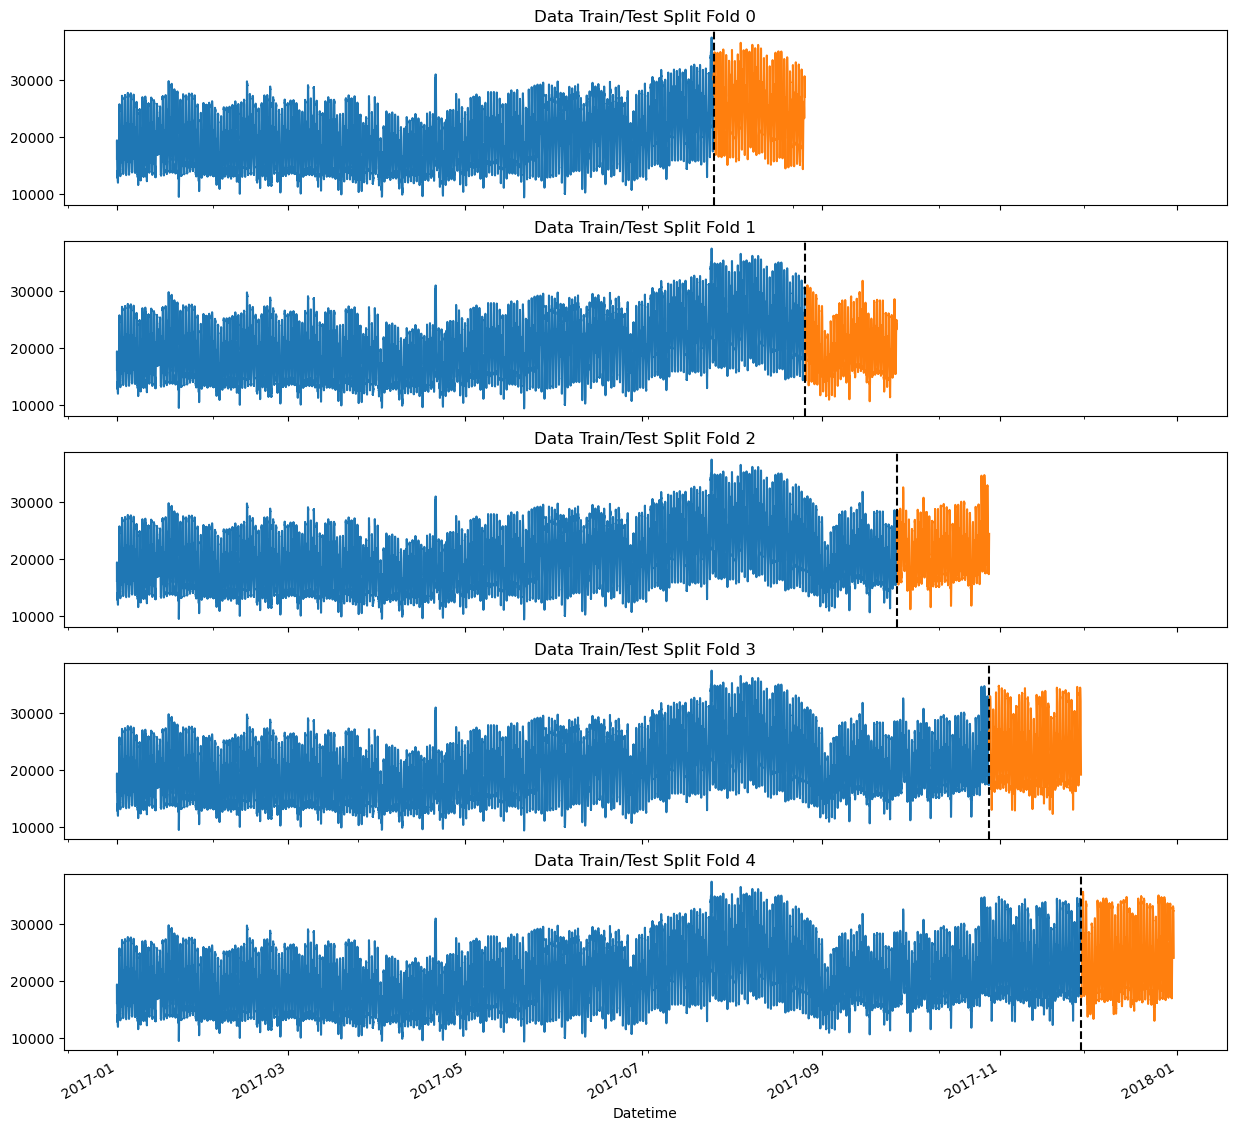

In [413]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train):
    train_ = train.iloc[train_idx]
    test_ = train.iloc[val_idx]
    train_['PowerConsumption_Zone2'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test_['PowerConsumption_Zone2'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test_.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [414]:
tss = TimeSeriesSplit(n_splits=5, test_size=10*364*1, gap=10)



fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(train):
    train_ = train.iloc[train_idx]
    test_ = train.iloc[val_idx]

  
    FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour',  'quarter', 'month',
        'dayofyear', 'dayofmonth',  'lag1', 'lag2',
       'lag3']
    TARGET = ['PowerConsumption_Zone2']

    X_train = train_[FEATURES]
    y_train = train_[TARGET]

    X_test = test_[FEATURES]
    y_test = test_[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[23:40:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20011.24157	validation_1-rmse:25942.97183
[100]	validation_0-rmse:7618.07229	validation_1-rmse:11007.19947
[200]	validation_0-rmse:3352.31381	validation_1-rmse:4151.71270
[300]	validation_0-rmse:2110.16532	validation_1-rmse:2443.77988
[388]	validation_0-rmse:1830.70075	validation_1-rmse:2487.17949
[23:40:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20898.03703	validation_1-rmse:20368.53055
[100]	validation_0-rmse:7951.52535	validation_1-rmse:4845.56274
[200]	validation_0-rmse:3493.36932	validation_1-rmse:2662.57136
[218]	validation_0-rmse:3108.27240	validation_1-rmse:2943

In [415]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 2183.6144
Fold scores:[2381.6115498405175, 2351.494922588344, 2379.407125910156, 2144.6598999943776, 1660.8983575975442]


In [417]:

FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour', 'quarter', 'month',
        'dayofyear', 'dayofmonth',  'lag1', 'lag2',
       'lag3']
TARGET = ['PowerConsumption_Zone2']

X_all2 = train[FEATURES]
y_all2 = train[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all2, y_all2,
        eval_set=[(X_all2, y_all2)],
        verbose=100)

[23:42:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21470.84211
[100]	validation_0-rmse:8246.50124
[200]	validation_0-rmse:3719.76260
[300]	validation_0-rmse:2392.26762
[400]	validation_0-rmse:2025.69724
[499]	validation_0-rmse:1895.57513


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [418]:
y_all2.sort_index()

,PowerConsumption_Zone2
Datetime,
2017-01-01 00:00:00,16128.87538
2017-01-01 00:10:00,19375.07599
2017-01-01 00:20:00,19006.68693
2017-01-01 00:30:00,18361.09422
2017-01-01 00:50:00,17416.41337
...,...
2017-12-30 23:00:00,27273.39675
2017-12-30 23:10:00,26857.31820
2017-12-30 23:20:00,26124.57809


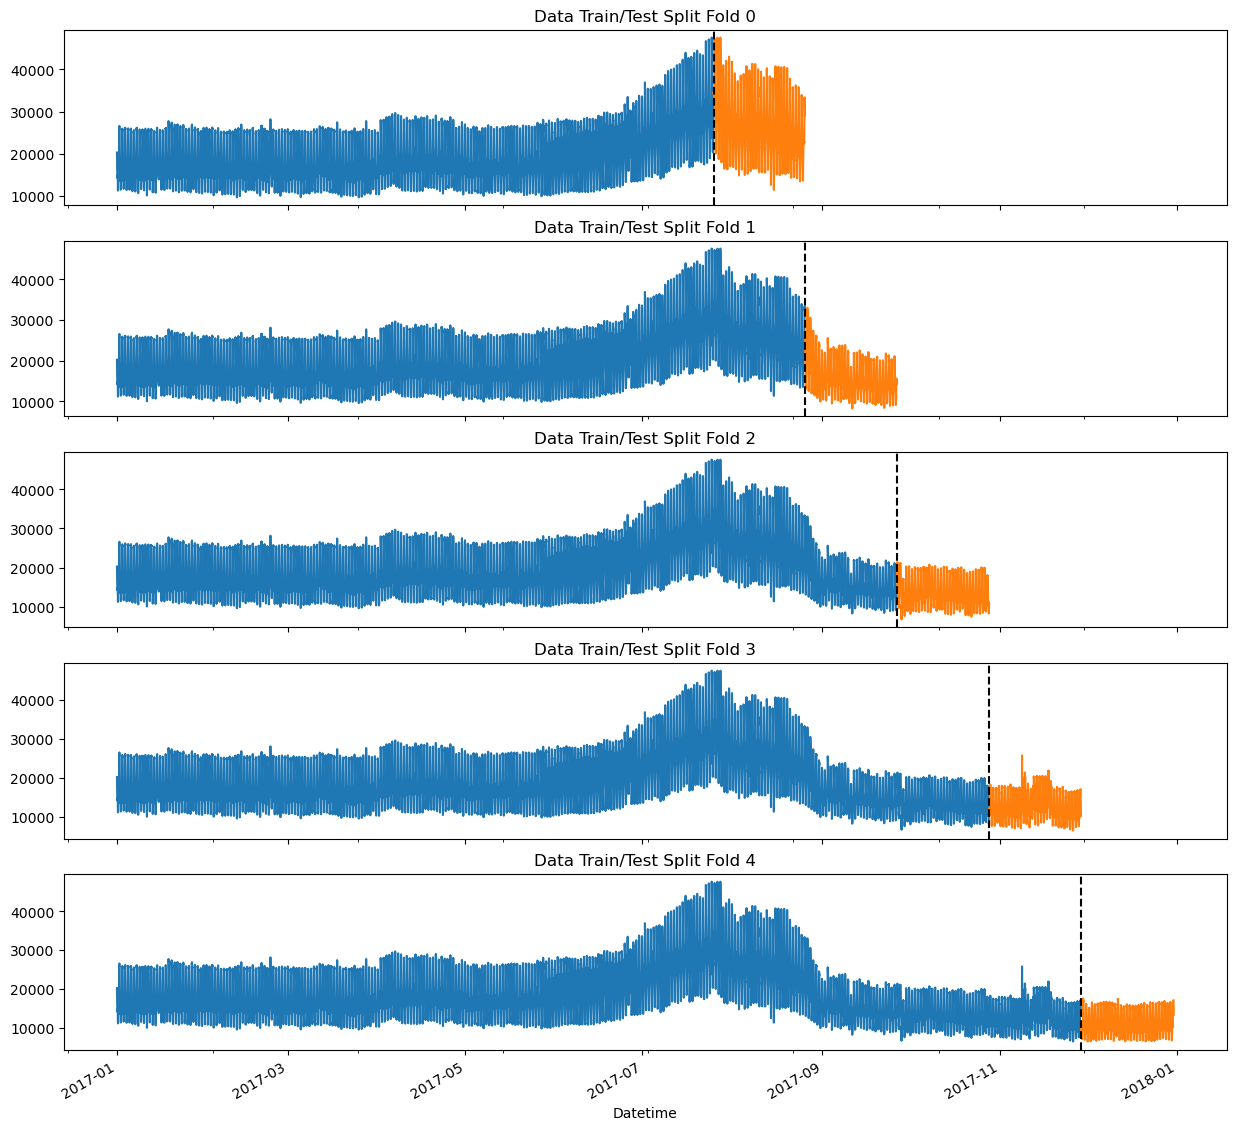

In [419]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train):
    train_ = train.iloc[train_idx]
    test_ = train.iloc[val_idx]
    train_['PowerConsumption_Zone3'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test_['PowerConsumption_Zone3'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test_.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [420]:
tss = TimeSeriesSplit(n_splits=5, test_size=10*364*1, gap=10)



fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(train):
    train_ = train.iloc[train_idx]
    test_ = train.iloc[val_idx]

  
    FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour',  'quarter', 'month',
        'dayofyear', 'dayofmonth',  'lag1', 'lag2',
       'lag3']
    TARGET = ['PowerConsumption_Zone3']

    X_train = train_[FEATURES]
    y_train = train_[TARGET]

    X_test = test_[FEATURES]
    y_test = test_[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[23:44:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:19910.15737	validation_1-rmse:27419.51691
[100]	validation_0-rmse:7625.47389	validation_1-rmse:9458.84230
[200]	validation_0-rmse:3256.56882	validation_1-rmse:3548.88319
[289]	validation_0-rmse:1942.11098	validation_1-rmse:3443.63276
[23:44:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21075.70409	validation_1-rmse:16154.01809
[100]	validation_0-rmse:8110.75075	validation_1-rmse:2504.24488
[143]	validation_0-rmse:5529.32150	validation_1-rmse:4676.24221
[23:44:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src

In [421]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 2179.5044
Fold scores:[3240.377164332518, 2408.3287976030574, 1626.9171843597712, 2277.1393514902556, 1344.7596033689154]


In [422]:

FEATURES=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour', 'quarter', 'month',
        'dayofyear', 'dayofmonth',  'lag1', 'lag2',
       'lag3']
TARGET = ['PowerConsumption_Zone3']

X_all3 = train[FEATURES]
y_all3 = train[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all3, y_all3,
        eval_set=[(X_all3, y_all3)],
        verbose=100)

[23:44:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18849.65081
[100]	validation_0-rmse:7444.77823
[200]	validation_0-rmse:3494.26768
[300]	validation_0-rmse:2255.16655
[400]	validation_0-rmse:1855.55365
[499]	validation_0-rmse:1689.12680


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [423]:
y_all3.sort_index()

,PowerConsumption_Zone3
Datetime,
2017-01-01 00:00:00,20240.96386
2017-01-01 00:10:00,20131.08434
2017-01-01 00:20:00,19668.43373
2017-01-01 00:30:00,18899.27711
2017-01-01 00:50:00,18130.12048
...,...
2017-12-30 23:00:00,14987.75510
2017-12-30 23:10:00,14780.31212
2017-12-30 23:20:00,14428.81152


In [436]:
y_all3.isnull().sum()

PowerConsumption_Zone3    0
dtype: int64

In [466]:
data = pd.concat([y_all, y_all2, y_all3], axis=1)


In [467]:
data

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,
2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,26624.81013,17416.41337,18130.12048
...,...,...,...
2017-12-30 23:00:00,32158.17490,27273.39675,14987.75510
2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152


In [441]:
data.isnull().sum()

PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [472]:
data = data.rename(columns={'PowerConsumption_Zone1': 'predicted_Zone1', 'PowerConsumption_Zone2': 'predicted_Zone2', 'PowerConsumption_Zone3' : 'predicted_Zone3'})


In [464]:
data = data.reset_index()

In [473]:
data

,predicted_Zone1,predicted_Zone2,predicted_Zone3
Datetime,,,
2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,26624.81013,17416.41337,18130.12048
...,...,...,...
2017-12-30 23:00:00,32158.17490,27273.39675,14987.75510
2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152


In [453]:
import pandas as pd


file_path = '/Users/SalmaDkier/Desktop/fdata.csv'

# save the DataFrame to a CSV file at the specified location
data.to_csv(file_path, index=False)

In [474]:
new_data = pd.concat([ train, data], axis=1)

In [475]:
new_data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,quarter,month,dayofyear,dayofmonth,minute,lag1,lag2,lag3,predicted_Zone1,predicted_Zone2,predicted_Zone3
Datetime,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,1,1,0,NaN,NaN,NaN,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,1,1,10,NaN,NaN,NaN,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,1,1,20,NaN,NaN,NaN,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,1,1,30,NaN,NaN,NaN,28228.86076,18361.09422,18899.27711
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,0,1,1,1,1,50,NaN,NaN,NaN,26624.81013,17416.41337,18130.12048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:00:00,7.070,72.5,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,23,4,12,364,30,0,32067.69231,26427.27273,13607.71084,32158.17490,27273.39675,14987.75510
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,4,12,364,30,10,31347.69231,25705.78512,13301.20482,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,4,12,364,30,20,30603.07692,25088.42975,13081.44578,30430.41825,26124.57809,14428.81152


In [477]:
score = np.sqrt(mean_squared_error(new_data['predicted_Zone2'], new_data['PowerConsumption_Zone2']))

score

0.0

In [ ]:
10483

In [454]:
testtt

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2/12/2017 14:40,13.28,82.80,0.074,127.000,128.400
1,11/22/2017 15:30,15.72,48.38,4.923,126.200,119.900
2,10/15/2017 1:50,17.25,85.80,0.079,0.055,0.130
3,9/11/2017 23:00,21.66,60.52,0.270,0.102,0.104
4,12/26/2017 1:20,8.75,79.90,0.079,0.066,0.126
...,...,...,...,...,...,...
10478,2/1/2017 13:00,12.39,47.18,4.920,581.400,623.500
10479,5/17/2017 14:40,21.70,65.90,4.919,780.000,313.900
10480,9/3/2017 7:00,20.34,54.32,4.924,9.500,6.165
10481,11/23/2017 11:40,11.89,60.13,4.921,469.100,45.410


In [168]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model object
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model using the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# Evaluate the model performance on the test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)


Mean squared error:  12009.032429427103
R2 score:  0.9993672794587192


In [425]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 1030.27580951693


In [426]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 1808378.3908529228


In [427]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 1344.7596033689154


In [428]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.7739889582110389


In [144]:
score = np.sqrt(mean_squared_error(test['predicted_Zone3'], test['PowerConsumption_Zone3']))


In [145]:
score

426.92134336527766

In [151]:
import pandas as pd


file_path = '/Users/SalmaDkier/Desktop/fdata.csv'

# save the DataFrame to a CSV file at the specified location
data.to_csv(file_path, index=False)
